In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 85% de los datos para entrenamiento y un 15% de los datos para validación
valid_idx  =  range ( len ( df ) - 43 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['SCL90_IDEA_PARAN', 'CAPE_POSIT_FREC', 'TRAUMA_FRECUENCIA', 'CSI_RESPROBL', 'CSI_PENSDESID', 'CSI_APOYOSOC', 'CSI_RETISOC', 'CSI_EVITPROBL', 'ANSIEDADRASGO', 'CSI_AUTOCRIT', 'CSI_REESTCOGN']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.116557 -0.154503  1.137509 -0.923816 ... -0.984847  1.269891  0.145201 -0.771025]
 [-0.897894  0.968617  2.080904  0.49699  ... -0.764683  1.1169   -0.031218 -1.514512]
 [ 0.469445 -0.475395 -0.371923 -0.517872 ...  1.436952 -1.330962 -1.266155  1.645311]
 [-0.70256   0.808171 -1.032299  0.091045 ...  0.996625 -0.718996  0.49804   1.087695]
 [-0.897894 -0.154503  0.854491 -0.314899 ... -0.324356 -0.566005 -0.913316 -0.771025]]
[1 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.143132,1.123487,0.232558,04:09
1,0.998434,1.051732,0.511628,03:41
2,0.938237,0.974123,0.604651,03:27
3,0.861664,0.903087,0.674419,03:25
4,0.808767,0.856429,0.674419,02:55
5,0.767341,0.826331,0.720930,02:50
6,0.741197,0.808541,0.720930,02:59
7,0.712328,0.821804,0.720930,03:08
8,0.678743,0.832412,0.744186,08:25
9,0.647124,0.843205,0.744186,03:30


SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,CSI_RESPROBL,CSI_PENSDESID,CSI_APOYOSOC,CSI_RETISOC,CSI_EVITPROBL,ANSIEDADRASGO,CSI_AUTOCRIT,CSI_REESTCOGN,target,prediction
-0.8979,-0.1545,-0.3719,-0.7208,0.7717,1.6052,-0.8236,1.6571,0.3519,2.0858,-0.3993,0,0
-0.8979,-0.3149,-0.9380,1.5119,-1.2250,-0.0856,-0.4005,-0.5445,-0.7190,-0.5605,1.8312,0,0
1.2508,-0.1545,-0.7493,-0.3149,0.1061,-0.0856,0.2342,0.3361,0.1990,0.4980,0.3442,0,0
0.0788,-0.3149,1.9866,-1.5327,0.6053,-1.4383,2.5613,2.7579,-1.0250,-0.3841,-1.1428,1,0
1.4461,-0.1545,-0.3719,-1.7357,-1.0586,-1.6073,1.0804,-1.2050,-0.8720,0.4980,-1.7004,1,0


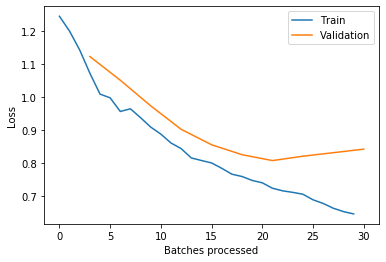

In [10]:
learn.recorder.plot_losses()
learn.show_results()